In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos_diabetes = pd.read_csv("/content/drive/MyDrive/proyecto final/diabetes.csv")

 **Información del DataFrame**

In [ ]:

print(datos_diabetes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


 **Verificar si hay valores nulos**

In [ ]:

print(datos_diabetes.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


**Descripción estadística del DataFrame**

In [ ]:

display(datos_diabetes.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Verificar filas duplicadas**

In [ ]:
print('Número de filas duplicadas: ', datos_diabetes.duplicated().sum())

Número de filas duplicadas:  0


 **Verificar valores cero que podrían ser errores en el registro del dato**

In [ ]:
conteo_ceros = (datos_diabetes.iloc[:, :-1] == 0).sum()
print(conteo_ceros)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


**Media de cada campo agrupado por Outcome (Si tiene o no diabetes)**

In [ ]:
media_campos = datos_diabetes.groupby("Outcome").mean()
print(media_campos)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


**Gráfico de la variable a predecir Outcome**



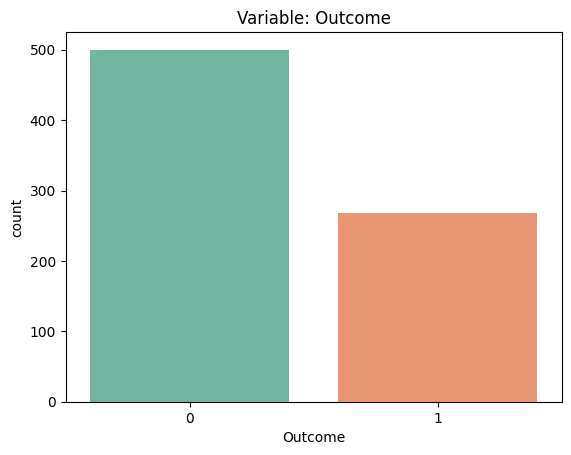

In [ ]:
sns.countplot(x = datos_diabetes["Outcome"], palette = "Set2")
plt.title("Variable: Outcome")
plt.show()

**Gráfico de matriz de dispersión (Scatter matrix plot)**

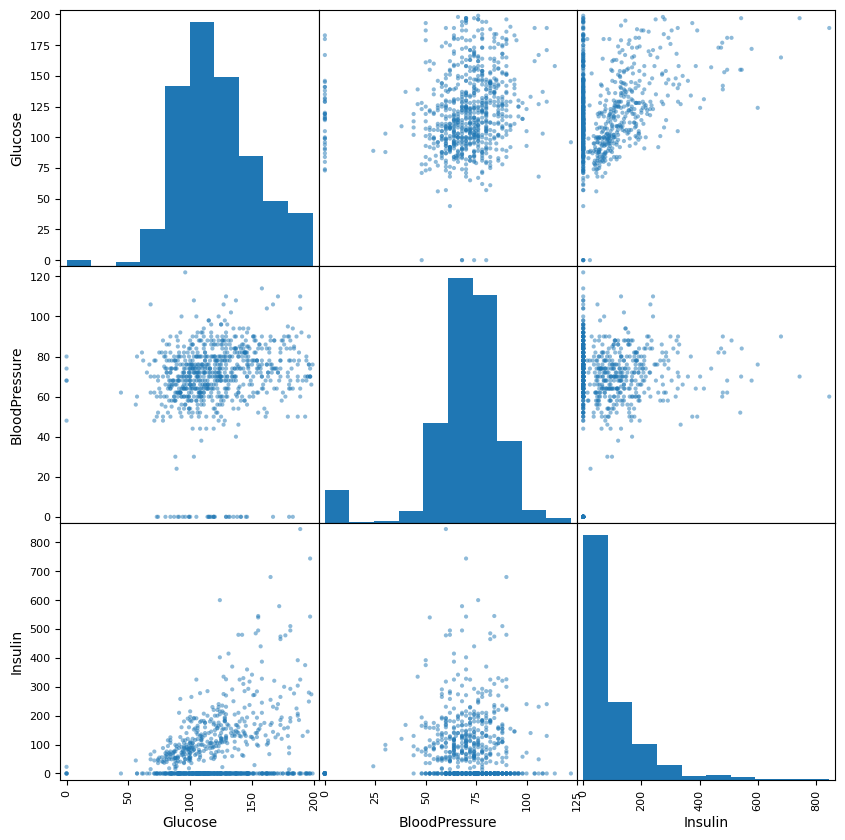

In [ ]:
pd.plotting.scatter_matrix(datos_diabetes[["Glucose", "BloodPressure", "Insulin"]], figsize=(10, 10))
plt.show()


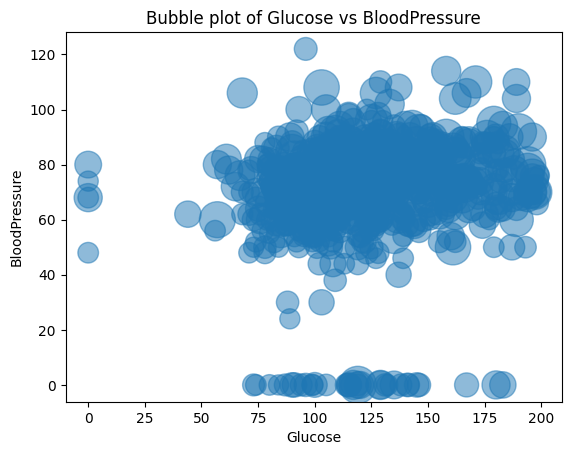

In [ ]:
plt.scatter(x=datos_diabetes["Glucose"], y=datos_diabetes["BloodPressure"], s=datos_diabetes["Age"]*10, alpha=0.5)
plt.xlabel("Glucose")
plt.ylabel("BloodPressure")
plt.title("Bubble plot of Glucose vs BloodPressure")
plt.show()


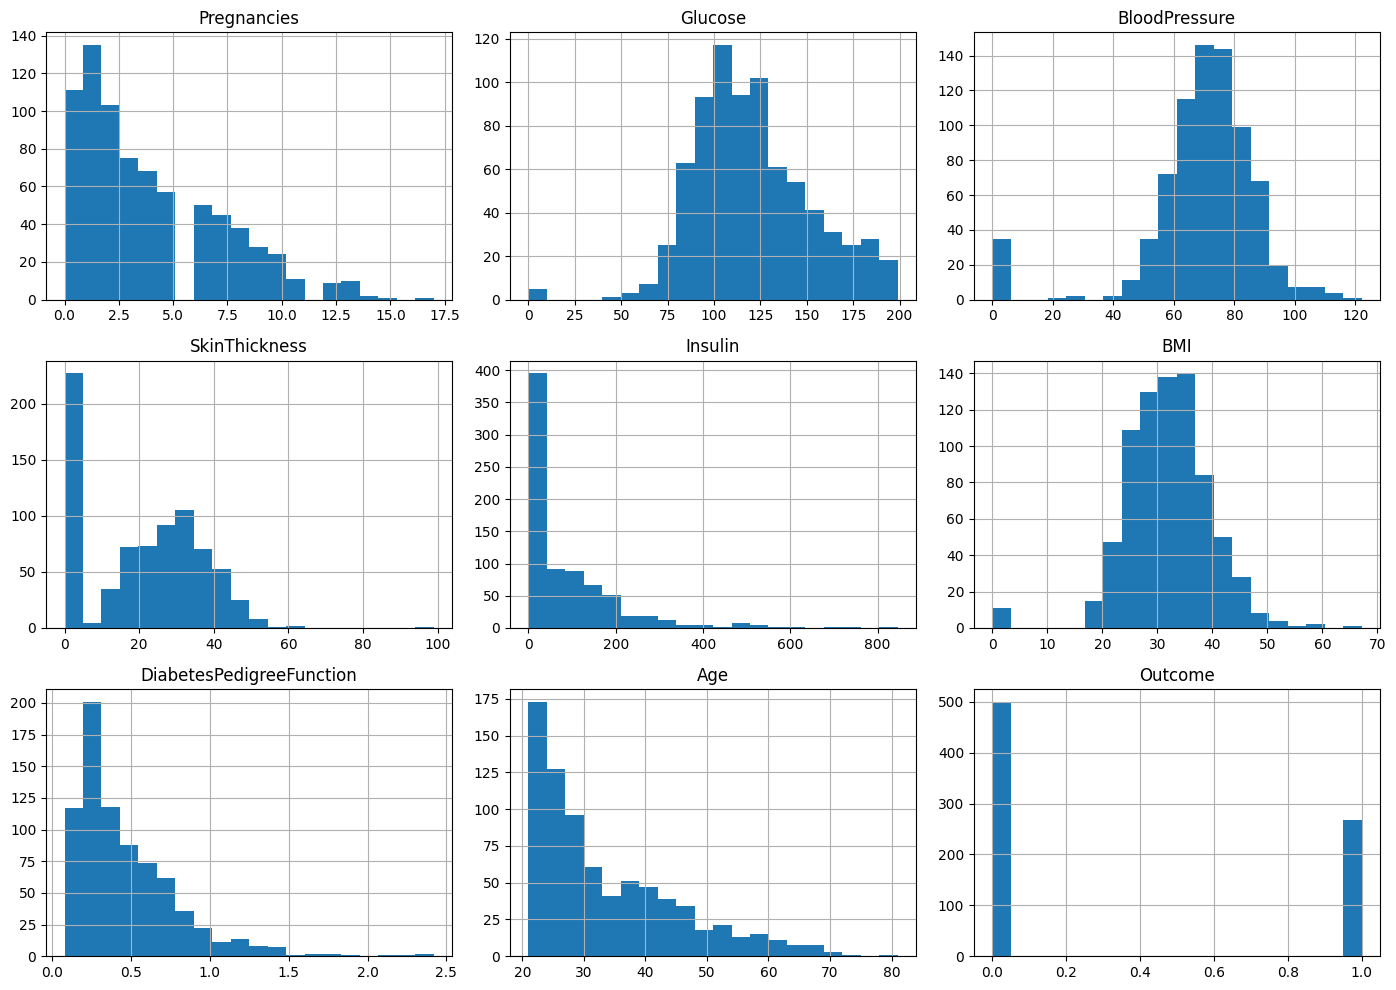

In [ ]:
# Histogramas de cada campo del dataset
datos_diabetes.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

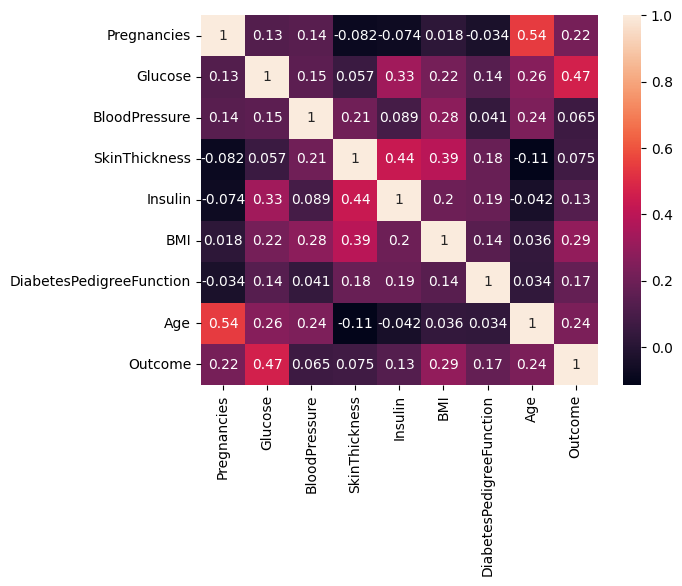

In [ ]:
correlation_matrix = datos_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
